In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['savefig.dpi'] = 300

In [56]:
# Load in data, remove useless features, assign dummy variables to categorical features
train = pd.read_csv('train.csv')
drop_features = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeID']
good_features = [c for c in train.columns if c not in drop_features]
train_dummies = pd.get_dummies(train[good_features], drop_first=True)
train_y = train_dummies.Attrition_Yes
train_x = train_dummies.loc[:, train_dummies.columns != 'Attrition_Yes']
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.25)

numerical_features = train[good_features].select_dtypes(include=np.number).columns
categorical_features = [f for f in x_train.columns if f not in numerical_features]

test_x_original = pd.read_csv('test.csv')
test_features = [c for c in good_features if c != 'Attrition']
test_x = pd.get_dummies(test_x_original[test_features], drop_first=True)

In [57]:
# Look at shape of training data
train.shape

(1340, 35)

In [58]:
# Look at shape of test data
test_x.shape

(336, 40)

Text(0.5, 1.0, 'Heatmap of Null Values')

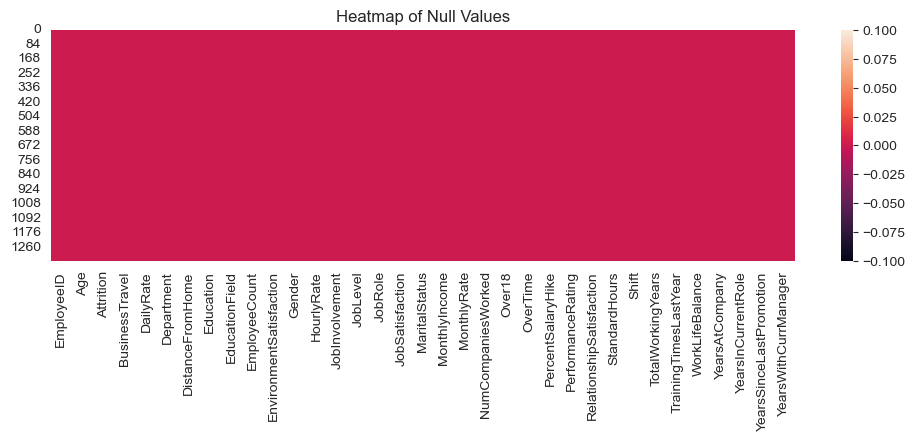

In [59]:
# Create heatmap of null values
plt.figure(figsize=(12,3))
sns.heatmap(train.isna())
plt.title('Heatmap of Null Values')
# plt.savefig('Graphs/NaNheatmap.png', bbox_inches='tight')

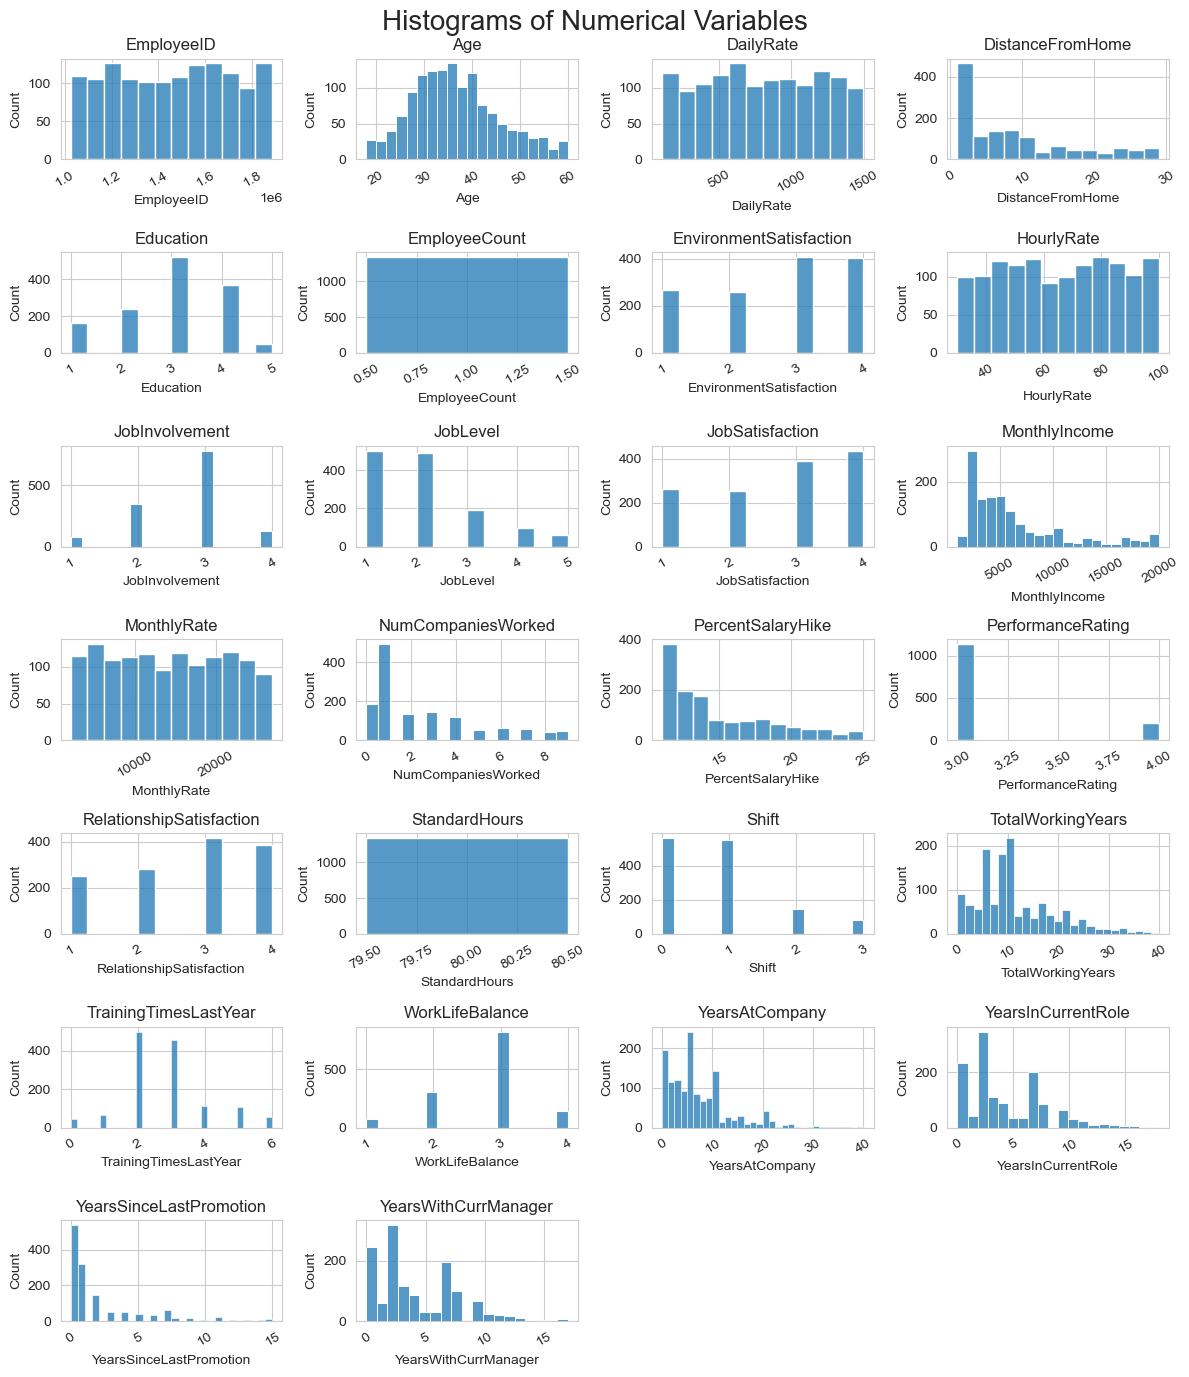

In [60]:
# Create histograms for each numerical variable in training data
num_histograms = plt.figure(figsize=(12,14))
# cat_barplots.tight_layout(pad=100)
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
for i, col in enumerate(train.select_dtypes(include='number').columns):
    plt.subplot(7,4,i+1)
    plt.title(col)
    sns.histplot(train[col])
    plt.xticks(rotation=30)

plt.tight_layout()

# plt.savefig('Graphs/NumHistograms2.png')

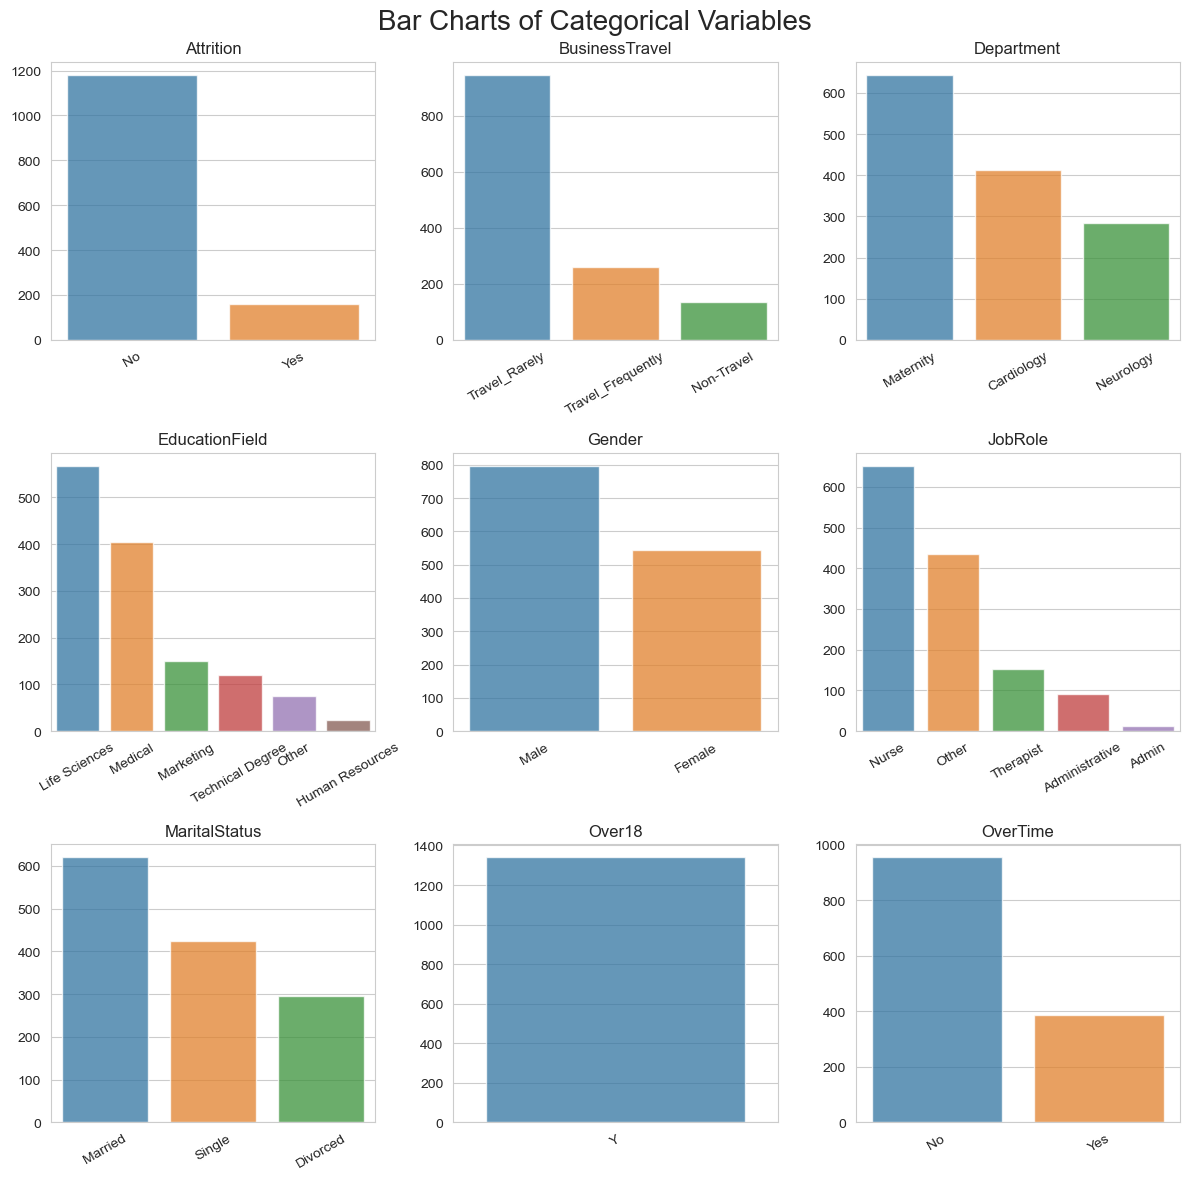

In [61]:
# Create bar charts for each categorical variable in training data
cat_barplots = plt.figure(figsize=(12,12))
plt.suptitle("Bar Charts of Categorical Variables", fontsize=20)
# cat_barplots.tight_layout(pad=100)
for i, col in enumerate(train.select_dtypes(exclude='number').columns):
    plt.subplot(3,3,i+1)
    plt.title(col)
    col_counts = train[col].value_counts()
    sns.barplot(x=col_counts.index, y=col_counts.values, alpha=0.75)
    plt.xticks(rotation=30)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
# plt.savefig('Graphs/BarChartsCat.png')


In [62]:
# Look at correlations to target variable
train_dummies.corr().Attrition_Yes.abs().sort_values(ascending=False)

Attrition_Yes                       1.000000
OverTime_Yes                        0.327144
Age                                 0.269277
TotalWorkingYears                   0.254779
JobLevel                            0.226127
YearsInCurrentRole                  0.216750
YearsAtCompany                      0.213344
YearsWithCurrManager                0.207276
MonthlyIncome                       0.207201
MaritalStatus_Single                0.206861
JobInvolvement                      0.167779
Shift                               0.157736
EnvironmentSatisfaction             0.121397
JobRole_Therapist                   0.116692
MaritalStatus_Married               0.113704
DistanceFromHome                    0.112645
JobRole_Other                       0.106040
JobRole_Administrative              0.099041
BusinessTravel_Travel_Frequently    0.095071
YearsSinceLastPromotion             0.087319
WorkLifeBalance                     0.084726
BusinessTravel_Travel_Rarely        0.077239
JobSatisfa

Text(0.5, 1.0, 'Feature Correlation Heatmap')

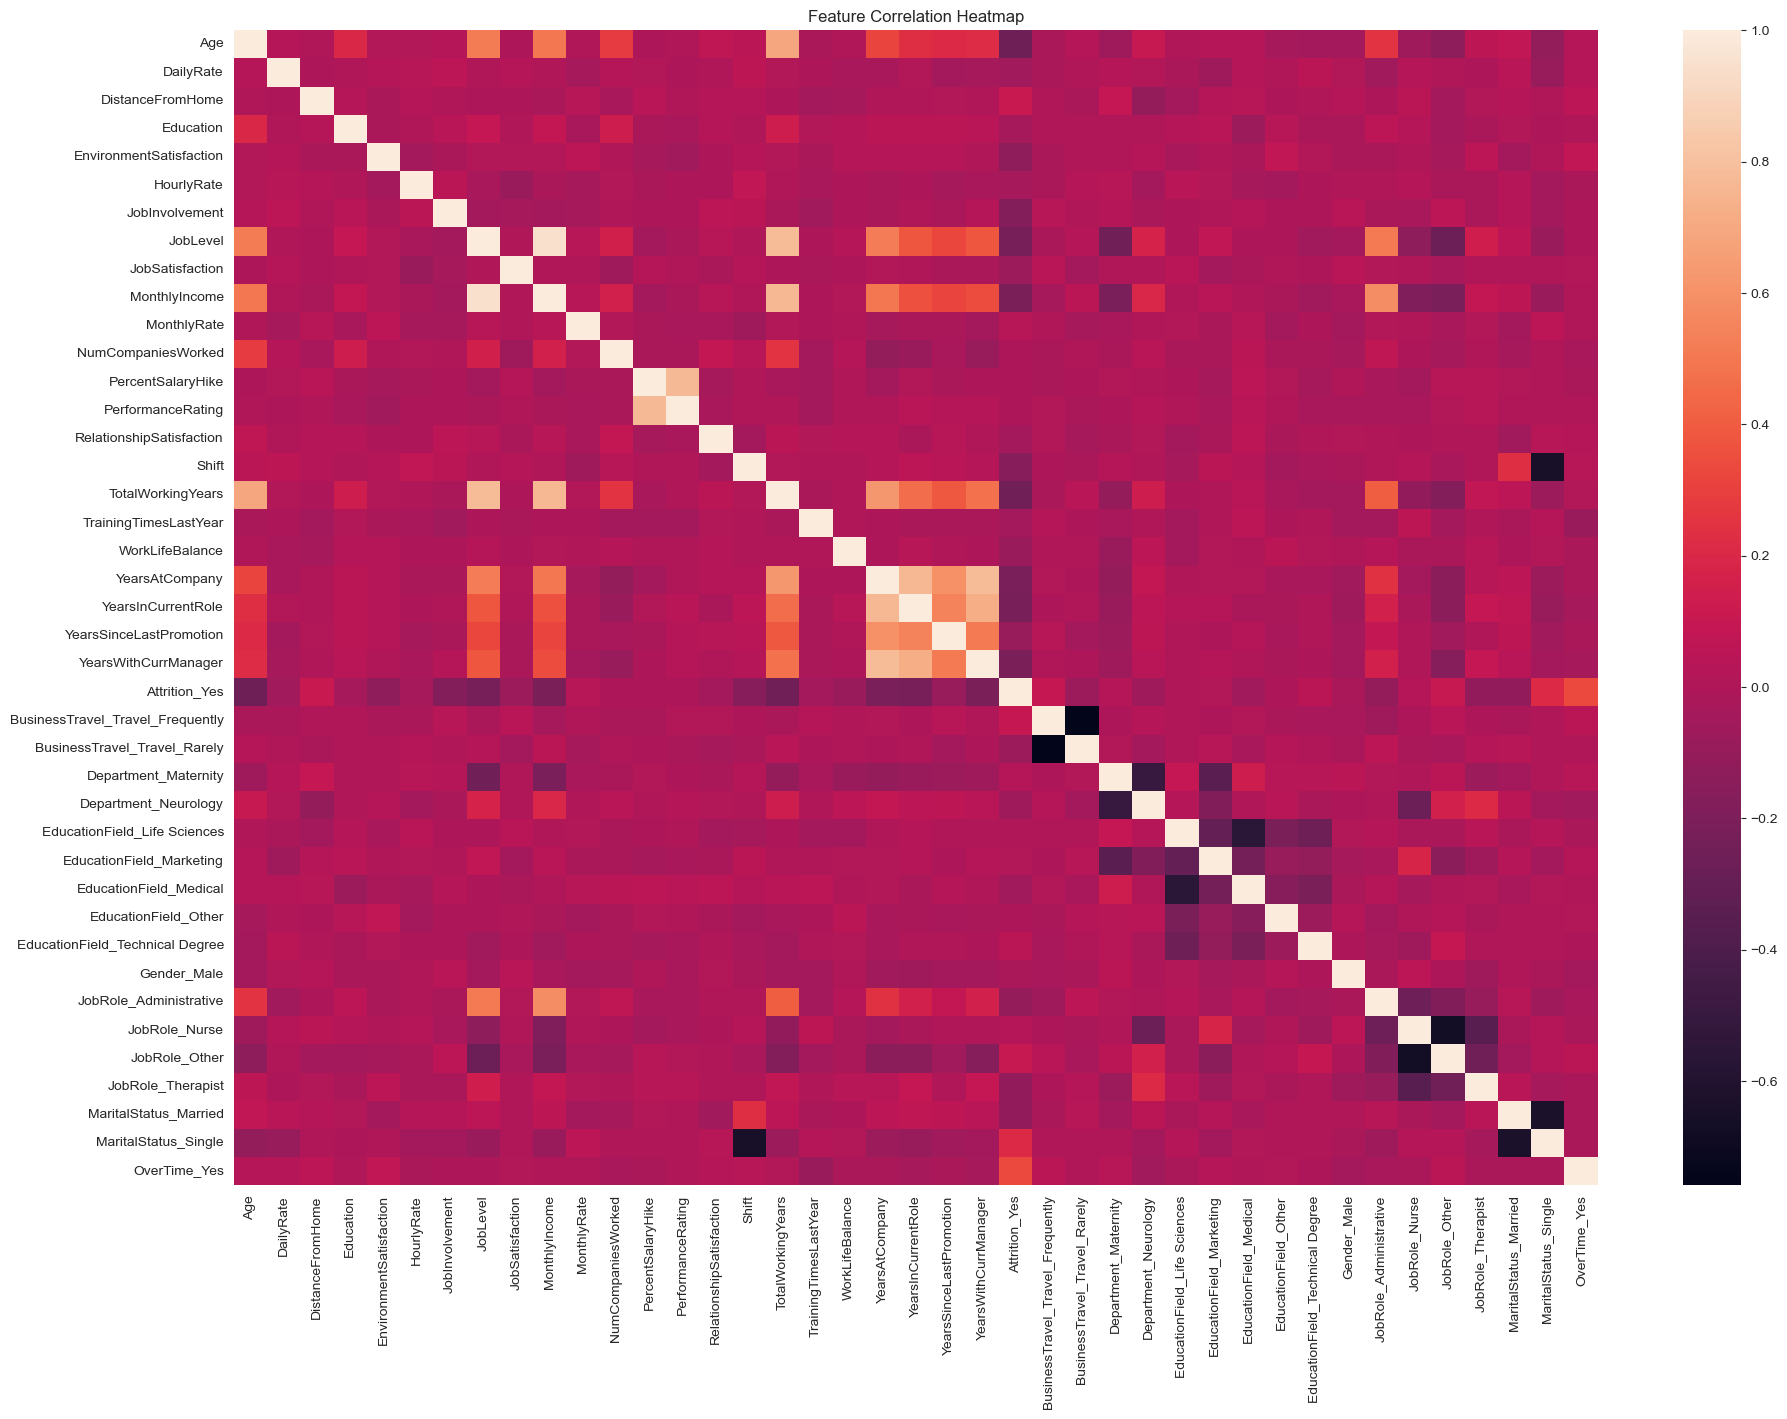

In [63]:
# Visualize correlation matrix of training data
plt.figure(figsize=(22,15))
sns.heatmap(train_dummies.corr())
plt.title('Feature Correlation Heatmap')
# plt.savefig('Graphs/correlationheatmap.png',bbox_inches='tight')

In [64]:
train_dummies.corr().Attrition_Yes.sort_values(ascending=False)[:20].index.values

array(['Attrition_Yes', 'OverTime_Yes', 'MaritalStatus_Single',
       'DistanceFromHome', 'JobRole_Other',
       'BusinessTravel_Travel_Frequently',
       'EducationField_Technical Degree', 'MonthlyRate', 'JobRole_Nurse',
       'Department_Maternity', 'EducationField_Marketing',
       'EducationField_Life Sciences', 'NumCompaniesWorked',
       'PerformanceRating', 'PercentSalaryHike', 'EducationField_Other',
       'Gender_Male', 'HourlyRate', 'Education',
       'RelationshipSatisfaction'], dtype=object)

Text(0, 0.5, 'True Positive Rate')

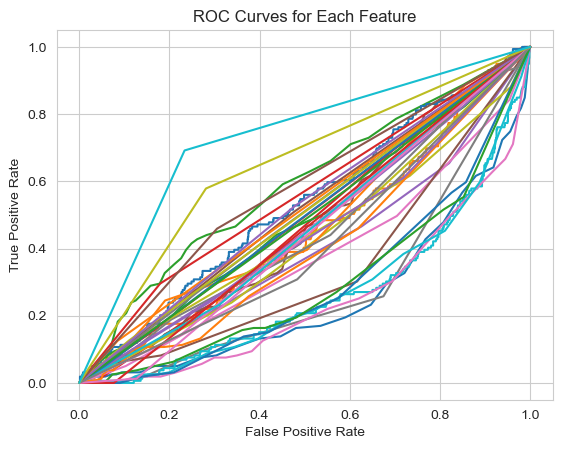

In [65]:
# Plot roc curves for all features
auc_scores = []
for i, feature in enumerate(x_train.columns):
    fpr_train, tpr_train, thresholds_train = roc_curve(train_y, train_x[feature])
    auc_scores.append((feature, roc_auc_score(train_y, train_x[feature])))
    plt.plot(fpr_train, tpr_train, label=feature)
plt.title('ROC Curves for Each Feature')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.legend()

Text(0, 0.5, 'True Positive Rate')

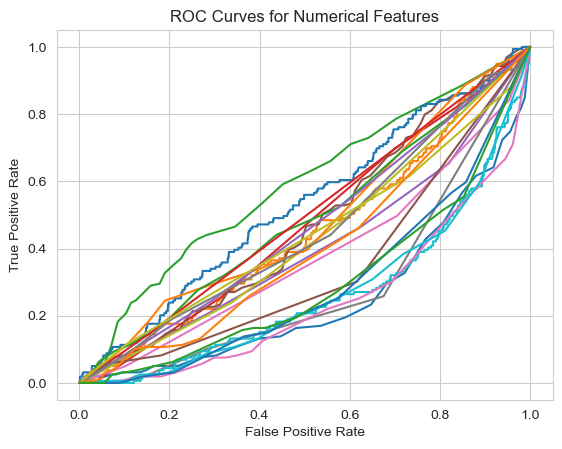

In [66]:
# Plot ROC curves for numerical features
for i, feature in enumerate(numerical_features):
    fpr_train, tpr_train, thresholds_train = roc_curve(train_y, train_x[feature])
    plt.plot(fpr_train, tpr_train, label=feature)
plt.title('ROC Curves for Numerical Features')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.savefig('Graphs/FeatureROCNum.png')
# plt.legend()

Text(0, 0.5, 'True Positive Rate')

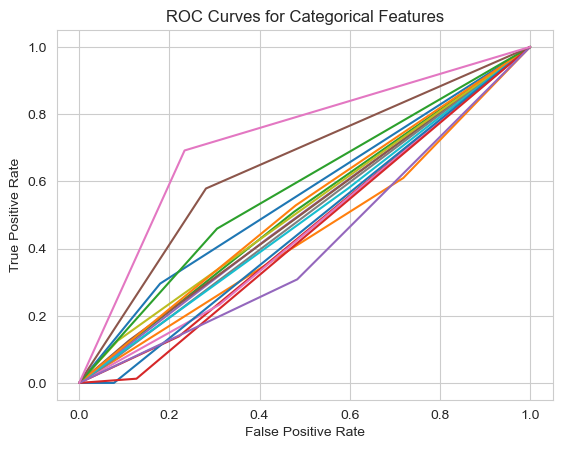

In [67]:
# Plot ROC curves for categorical features
for i, feature in enumerate(categorical_features):
    fpr_train, tpr_train, thresholds_train = roc_curve(train_y, train_x[feature])
    plt.plot(fpr_train, tpr_train, label=feature)
plt.title('ROC Curves for Categorical Features')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.savefig('Graphs/FeatureROCCat.png')
# plt.legend()

In [68]:
auc_scores.sort(key=lambda x: abs(x[1]-0.5), reverse=True)
predictive_features = [x[0] for x in auc_scores[:20]]

Text(0.5, 1.0, 'TSNE Projection of Data')

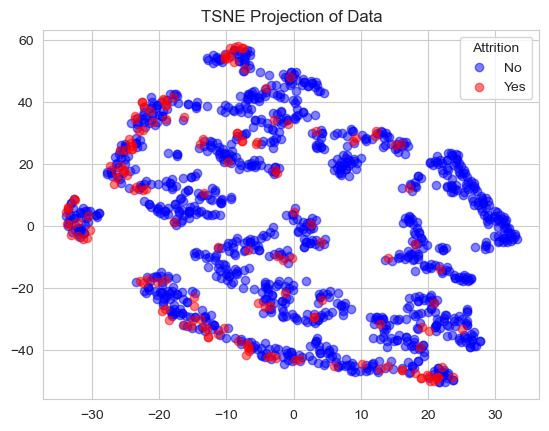

In [69]:
# Visualize data using TSNE
x_tsne = TSNE(perplexity=30).fit_transform(train_x)
plt.scatter(x=x_tsne[train_y == 0][:,0], y=x_tsne[train_y == 0][:,1], c='blue', alpha=0.5, label='No')
plt.scatter(x=x_tsne[train_y == 1][:,0], y=x_tsne[train_y == 1][:,1], c='red', alpha=0.5, label='Yes')
plt.legend(title='Attrition')
plt.title("TSNE Projection of Data")
# plt.savefig('Graphs/tsne2dp30.png')

Text(0.5, 1.0, 'UMAP Projection of Dataset')

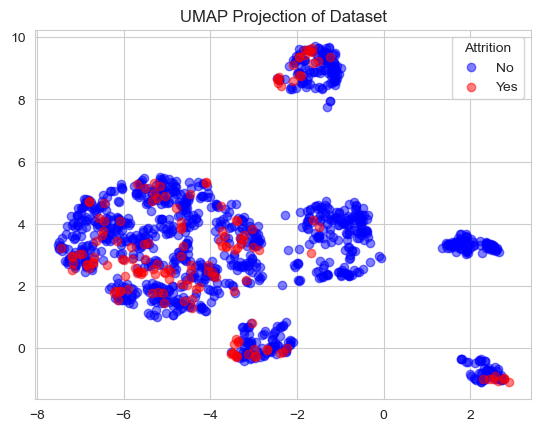

In [70]:
# Visualize data using UMAP
x_train_scaled = StandardScaler().fit_transform(train_x)
x_umap = umap.UMAP().fit_transform(x_train_scaled)
plt.scatter(x=x_umap[train_y == 0][:,0], y=x_umap[train_y == 0][:,1], c='blue', alpha=0.5, label='No')
plt.scatter(x=x_umap[train_y == 1][:,0], y=x_umap[train_y == 1][:,1], c='red', alpha=0.5, label='Yes')
plt.legend(title='Attrition')
plt.title("UMAP Projection of Dataset")
# plt.savefig('Graphs/umap2dpdefault.png')

Text(0.5, 1.0, 'PCA Projection of Dataset')

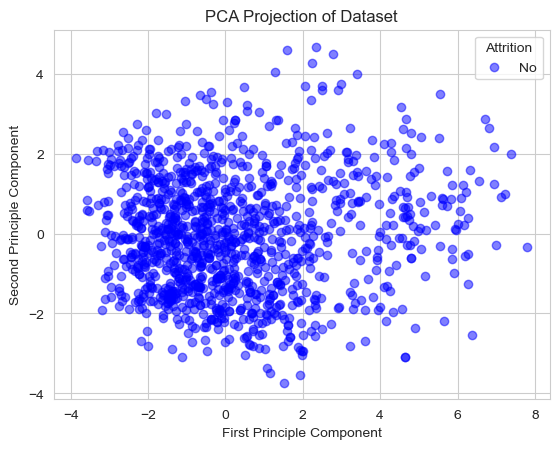

In [71]:
# Visualize data using PCA
x_pca = PCA(n_components=2).fit_transform(x_train_scaled)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.scatter(x=x_pca[train_y == 0][:,0], y=x_pca[train_y == 0][:,1], c='blue', alpha=0.5, label='No')
# plt.scatter(x=x_pca[train_y == 1][:,0], y=x_pca[train_y == 1][:,1], c='red', alpha=0.5, label='Yes')
plt.legend(title='Attrition')
plt.title("PCA Projection of Dataset")
# plt.savefig('Graphs/pca2dNo.png')

Text(0.5, 0.92, 'PCA Projection of Dataset')

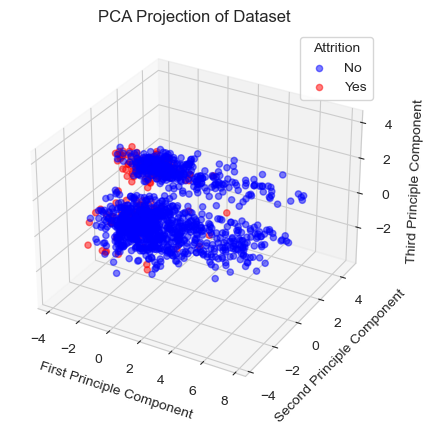

In [72]:
# Visualize data in 3D using PCA
x_pca = PCA(n_components=3).fit_transform(x_train_scaled)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca[train_y == 0][:,0], x_pca[train_y == 0][:,1], x_pca[train_y==0][:,2], c='blue', alpha=0.5, label='No')
ax.scatter(x_pca[train_y == 1][:,0], x_pca[train_y == 1][:,1], x_pca[train_y==1][:,2], c='red', alpha=0.5, label='Yes')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
ax.set_zlabel('Third Principle Component')
# plt.scatter(x=x_pca[train_y == 1][:,0], y=x_pca[train_y == 1][:,1], c='red', alpha=0.5, label='Yes')
plt.legend(title='Attrition')
plt.title("PCA Projection of Dataset")
# plt.savefig('Graphs/pca3dBoth.png')

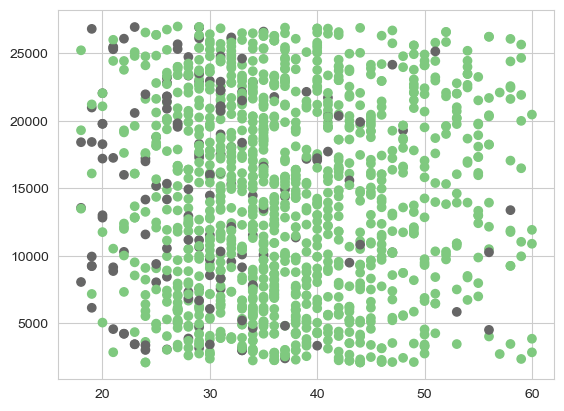

In [73]:
# Scatter plot of Age vs. Monthly Rate colored by Attrition Value
plt.scatter(x=train_x.Age, y=train_x.MonthlyRate, c=train_y, cmap='Accent')

In [74]:
# Fit logistic regression model to training data
model = LogisticRegression(class_weight='balanced').fit(x_train, y_train)
f1_score(model.predict(x_val), y_val)

0.33566433566433573

In [75]:
# Fit random forest model to training data
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=6).fit(x_train, y_train)
f1_score(rf_model.predict(x_val), y_val)

0.5675675675675675

In [76]:
# Fit XGBoost model to training data
scaling = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(scale_pos_weight=scaling, max_depth=5).fit(x_train[predictive_features], y_train)
f1_score(xgb_model.predict(x_val[predictive_features]), y_val)

[20:00:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6052631578947368

In [77]:
# Create initial XGBoost predictions to compare result with baseline on Kaggle leaderboard
submission6 = pd.DataFrame(xgb_model.predict(test_x[predictive_features])).rename(columns={0: 'Predicted'})
submission6.index.rename('Id', inplace=True)
submission6.to_csv('submission6.csv')

In [78]:
# Look at XGBoost model feature importances
xgb_model.get_booster().get_score(importance_type='total_gain')

{'TotalWorkingYears': 479.4785461425781,
 'Age': 663.6758422851562,
 'MonthlyIncome': 396.1846618652344,
 'YearsAtCompany': 308.6967468261719,
 'OverTime_Yes': 869.488037109375,
 'JobLevel': 74.30020141601562,
 'YearsInCurrentRole': 72.86554718017578,
 'YearsWithCurrManager': 57.48765182495117,
 'Shift': 182.5340118408203,
 'MaritalStatus_Single': 107.9872817993164,
 'JobInvolvement': 193.6339111328125,
 'EnvironmentSatisfaction': 187.33905029296875,
 'YearsSinceLastPromotion': 98.68278503417969,
 'DistanceFromHome': 466.9065856933594,
 'MaritalStatus_Married': 40.28858947753906,
 'JobRole_Other': 30.742328643798828,
 'JobSatisfaction': 105.19133758544922,
 'BusinessTravel_Travel_Frequently': 42.11652374267578,
 'JobRole_Therapist': 22.300079345703125,
 'WorkLifeBalance': 228.75448608398438}